# Word embeddings (static)

### Resources, including pre-trained word embeddings!

- Word2vec (Mikolov et al., 2013): https://code.google.com/archive/p/word2vec/
- Fasttext: http://www.fasttext.cc/ (+sub-word information, +multilingual)
- Glove (Pennington, Socher, Manning, 2014): http://nlp.stanford.edu/projects/glove/



Gensim documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

Embeddings visualizer: https://projector.tensorflow.org/ - more details in a bit...


## Loading and using (pretrained) (static) word embeddings

We have seen how word embeddings are trained using some text corpus. In general, the larger the corpus, the better the resulted embeddings! Fortunately, there are many repositories of already trained ("pre-trained") embeddings based on very large text corpora (Wikipedia and more...).

We can load these in python (one solution is through the gensim library) and explore them, to understand more about the language and the corpus they were trained on.

In [1]:
import gensim


In [2]:
# Show all available models in gensim-data
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
# embeddings_twitter_long = gensim.downloader.load('glove-twitter-200')
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

# Download the "GloVe 25" embeddings - recommendation for faster download
embeddings_twitter = gensim.downloader.load('glove-twitter-25')

[==================================================] 100.0% 958.5/958.4MB downloaded
[==================================================] 100.0% 104.8/104.8MB downloaded


In [4]:
print(len(embeddings.index_to_key))
print(len(embeddings_twitter.index_to_key))

999999
1193514


In [ ]:
embeddings.get_vector('cat')

array([ 4.7426e-02, -4.2203e-02,  2.8491e-02, -4.4481e-02, -2.6467e-02,
        3.3557e-02,  1.7173e-01, -1.4773e-01,  7.1133e-02,  3.8385e-02,
       -7.9921e-02, -1.3236e-03,  1.6185e-01, -1.6389e-01, -6.5456e-02,
        2.7030e-02,  1.2193e-01, -7.1632e-02,  7.9642e-02, -1.4602e-01,
        1.0369e-02, -1.0468e-01,  3.6734e-02,  7.9116e-02,  1.8241e-01,
       -2.4902e-03,  1.3818e-02,  1.2378e-01,  1.7348e-04,  1.6646e-02,
       -1.3513e-02, -7.5532e-02,  1.0060e-01,  7.1226e-02, -2.7468e-02,
       -7.8517e-02,  3.3769e-02, -1.6082e-01, -2.2747e-02, -1.3238e-01,
        1.1198e-02, -1.2838e-01, -5.8910e-02, -5.1399e-02,  3.9177e-02,
        5.8243e-02,  2.2071e-02,  7.1876e-02,  2.8166e-02, -1.8918e-02,
        3.4445e-02,  1.5664e-01,  6.9836e-02, -2.0858e-01,  2.4413e-03,
       -8.9110e-02, -6.0705e-02,  6.5106e-02, -8.3036e-02,  1.7491e-02,
       -3.4527e-02, -2.5026e-01,  1.8777e-01, -3.6235e-02,  1.2452e-01,
        2.4356e-02, -4.4517e-03,  5.5572e-02, -8.6161e-03, -1.61

In [ ]:
embeddings.most_similar('cat')

[('cats', 0.8368596434593201),
 ('housecat', 0.767471194267273),
 ('-cat', 0.7602992057800293),
 ('dog', 0.7502298951148987),
 ('kitten', 0.7480817437171936),
 ('feline', 0.7353992462158203),
 ('super-cat', 0.7305206060409546),
 ('supercat', 0.7163284420967102),
 ('pet', 0.7090284824371338),
 ('moggy', 0.7057286500930786)]

In [ ]:
embeddings_twitter.most_similar('cat')

[('dog', 0.8324302434921265),
 ('cats', 0.7685185074806213),
 ('kitty', 0.750445544719696),
 ('kitten', 0.7489697933197021),
 ('pet', 0.7319862842559814),
 ('puppy', 0.7023192644119263),
 ('dogs', 0.7016381621360779),
 ('animal', 0.6421106457710266),
 ('bear', 0.6309184432029724),
 ('meow', 0.6304775476455688)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    embeddings.get_vector('cat').reshape(1,-1),
    embeddings.get_vector('kitten').reshape(1,-1)
    )[0][0]

0.7480817

In [ ]:
embeddings.similarity('cat', 'kitten')

0.74808174

In [ ]:
embeddings.similarity('cat', 'puppy')

0.6651119

In [ ]:
embeddings.closer_than('cat', 'puppy')

['dog',
 'cats',
 'Cat',
 'pet',
 'kitten',
 'feline',
 'kitty',
 'subcat',
 'felines',
 'beagle',
 'sub-cat',
 'tomcat',
 'moggy',
 'housecat',
 'supercat',
 'moggie',
 'she-cat',
 're-cat',
 'cat-',
 'kittypet',
 'super-cat',
 '-cat']

#### Synonymy vs relatedness

In [ ]:
embeddings.similarity('uncle', 'sister')

0.7174434

In [ ]:
embeddings_twitter.similarity('uncle', 'sister')

0.6477544

In [ ]:
embeddings_twitter.similarity('sibling', 'sister')

0.517647

In [ ]:
embeddings_twitter.similarity('good', 'bad')

0.7983508

In [ ]:
embeddings.similarity('good', 'bad')

0.8503089

In [ ]:
embeddings.similarity('sister', 'sibling')

0.76012087

In [ ]:
embeddings.similarity('sister', 'mother')

0.76116526

In [ ]:
embeddings.similarity('Monday', 'Sunday')

0.85126

#### Normalization

In [ ]:
embeddings.most_similar("defenitly")

[('defenitely', 0.8840630650520325),
 ('defenetly', 0.8451886177062988),
 ('defently', 0.8433688282966614),
 ('definitly', 0.7705455422401428),
 ('definetly', 0.7526832818984985),
 ('politly', 0.7457023859024048),
 ('defnitely', 0.7323918342590332),
 ('probebly', 0.7254762649536133),
 ('definatly', 0.7249115109443665),
 ('usuallly', 0.7225544452667236)]

In [ ]:
embeddings.most_similar("hiii")

[('hiiii', 0.942829430103302),
 ('Hiii', 0.8571421504020691),
 ('Hiiii', 0.8538976311683655),
 ('hii', 0.7178280353546143),
 ('iiii', 0.7104865908622742),
 ('plzzz', 0.6919779181480408),
 ('plzzzz', 0.6852996945381165),
 ('hhh', 0.6836094260215759),
 ('wazzup', 0.6829248070716858),
 ('plzz', 0.6775454878807068)]

#### Word analogies

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828966617584229),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654637932777405),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.860465943813324)]

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

In [ ]:
# Rome - Italy + France
embeddings.most_similar_cosmul(positive=['Rome', 'France'], negative=['Italy'])

[('Paris', 0.9433915019035339),
 ('Meaux', 0.8968006372451782),
 ('Avignon', 0.8785353302955627),
 ('Saint-Denis', 0.8744450807571411),
 ('Rouen', 0.8729321956634521),
 ('Lyon', 0.8724958300590515),
 ('Louville', 0.8714753985404968),
 ('Toulouse', 0.8713099360466003),
 ('Beauvais', 0.8704253435134888),
 ('Blois', 0.8698782920837402)]

In [ ]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Egyptian'], negative=['Italian'])

[('tahini', 0.8285170793533325),
 ('egypt', 0.8267285227775574),
 ('hieroglyph', 0.8259803056716919),
 ('pharoah', 0.8252852559089661),
 ('Aswan', 0.8244057297706604),
 ('hummus', 0.8181288242340088),
 ('Egypt', 0.8177300691604614),
 ('Egypts', 0.8163665533065796),
 ('pharoahs', 0.8153097629547119),
 ('Tantawi', 0.8134909272193909)]

In [ ]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Romanian'], negative=['Italian'])

[('polenta', 0.7852737307548523),
 ('bulgar', 0.7823466658592224),
 ('bulgur', 0.7699621915817261),
 ('babka', 0.766016960144043),
 ('soup', 0.7643554210662842),
 ('mămăligă', 0.7633044719696045),
 ('cereal', 0.7588525414466858),
 ('pelmeni', 0.7585715651512146),
 ('masa', 0.7559653520584106),
 ('tin', 0.7554841041564941)]

In [ ]:
# cat - dog + puppy
embeddings.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9267358779907227),
 ('kitty', 0.8846307396888733),
 ('cats', 0.8722013235092163),
 ('kittens', 0.8703644871711731),
 ('kitties', 0.8619921803474426),
 ('kitteh', 0.8562358021736145),
 ('housecat', 0.8552347421646118),
 ('moggy', 0.8512866497039795),
 ('-cat', 0.8492761850357056),
 ('moggie', 0.847593367099762)]

In [ ]:
# morphology
embeddings.most_similar_cosmul(positive=['sing', 'played'], negative=['play'])

[('sang', 0.9599340558052063),
 ('sung', 0.9291717410087585),
 ('singing', 0.8538202047348022),
 ('crooned', 0.8523540496826172),
 ('serenaded', 0.8514723777770996),
 ('danced', 0.840410053730011),
 ('lip-synced', 0.8367202281951904),
 ('sings', 0.831756055355072),
 ('duetted', 0.8268839120864868),
 ('lip-synched', 0.8250396847724915)]

In [ ]:
# purple - blue + yellow
# green - blue + red?
embeddings.most_similar_cosmul(positive=['purple', 'yellow'], negative=['blue'])

[('orange', 0.9281182289123535),
 ('green-yellow', 0.9220715761184692),
 ('pink', 0.9197203516960144),
 ('orange-yellow', 0.9192143678665161),
 ('white-yellow', 0.9170408844947815),
 ('red-yellow', 0.9141272306442261),
 ('purple-blue', 0.9109879732131958),
 ('purple-red', 0.9094882607460022),
 ('yellow-orange', 0.9063596725463867),
 ('yellow-green', 0.9045568108558655)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['brother', 'woman'], negative=['man'])

[('sister', 0.9794360399246216),
 ('daughter', 0.9412024617195129),
 ('mother', 0.9372841715812683),
 ('mom', 0.9262226223945618),
 ('husband', 0.91740882396698),
 ('friend', 0.9102033376693726),
 ('wife', 0.9087694883346558),
 ('dad', 0.9083817005157471),
 ('sisters', 0.9073351621627808),
 ('father', 0.9037760496139526)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9388771653175354),
 ('kitty', 0.9139494895935059),
 ('pup', 0.8514729738235474),
 ('puppies', 0.8475602269172668),
 ('kittens', 0.8263034224510193),
 ('pug', 0.8220088481903076),
 ('cute', 0.8175343871116638),
 ('cats', 0.8136031031608582),
 ('husky', 0.8109297156333923),
 ('pet', 0.8099460005760193)]

In [ ]:
# computer_progammer - man + woman ... homemaker?
embeddings.most_similar_cosmul(positive=['programmer', 'woman'], negative=['man'])

[('non-programmer', 0.8644444346427917),
 ('programmers', 0.8571239113807678),
 ('Programmer', 0.8313320875167847),
 ('non-programmers', 0.8269446492195129),
 ('writer', 0.8260435461997986),
 ('coder', 0.8254762291908264),
 ('programer', 0.8239933848381042),
 ('nonprogrammers', 0.8238458633422852),
 ('web-designer', 0.819828987121582),
 ('researcher', 0.8139449954032898)]

In [ ]:
embeddings.most_similar('programmer')

[('programmers', 0.7715167999267578),
 ('programer', 0.7508100867271423),
 ('non-programmer', 0.750552773475647),
 ('Programmer', 0.7164676189422607),
 ('coder', 0.6946645379066467),
 ('developer', 0.6931316256523132),
 ('non-programmers', 0.6797455549240112),
 ('web-designer', 0.6595247983932495),
 ('engineer', 0.6481204032897949),
 ('writer', 0.6474664807319641)]

For biases which we find in the data through analogies, we can then try to de-bias the space to obtain a more fair one. More details here: https://colab.research.google.com/drive/16G0GBBwEqot0xoDBV30ftguN9yWCyzk_?usp=sharing

In [ ]:
embeddings.doesnt_match((('dog', 'cat', 'mouse', 'cake')))

'cake'

#### Multilingual embeddings & false friends

We also have pre-trained embeddings for many other languages! (including Romanian). For example, FastText published embedding vectors trained on Wikipedia for hundreds of languages (see link above). They are available as .txt or binary files, which can be downloaded from the FastText website and loaded in gensim.

More than that, for a subset of languages, they make available a common multilingual embedding space. We can use it to compare words in different languages!

**Disclaimer!**: In order to obtain a "combined" embedding space, a special "alignment" operation is needed after training each embedding space separately (English embeddings, Spanish embeddings, Romanian embeddings etc). We cannot take separately trained embedding spaces and compare them directly (even if they are in the same language), because the positions of words in the embedding space is not stable across training sessions (only their *relative* positions/distances are).

Let's try to download some aligned multilingual embedding spaces and see what we can do with them.

In [ ]:
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec # English embeddings, prealigned
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec # Spanish embeddings, prealigned

--2023-03-27 10:03:02--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.162.83, 108.157.162.120, 108.157.162.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.162.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628614720 (599M) [text/plain]
Saving to: ‘wiki.multi.en.vec’

wiki.multi.en.vec   100%[===================>] 599.49M  41.7MB/s    in 14s     

2023-03-27 10:03:17 (41.4 MB/s) - ‘wiki.multi.en.vec’ saved [628614720/628614720]

--2023-03-27 10:03:18--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.162.83, 108.157.162.120, 108.157.162.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.162.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628826336 (600M) [text/plain]
Saving to: ‘wiki.multi.es.vec’



Loading pretrained embeddings from local files

In [ ]:
from gensim.models import KeyedVectors
en_model = KeyedVectors.load_word2vec_format('wiki.multi.en.vec')  # Watch out for your RAM...
es_model = KeyedVectors.load_word2vec_format('wiki.multi.es.vec')


Detecting false friends using embedding similarity!

In [ ]:
embarrassed_vec = en_model.get_vector("embarassed")
pregnant_vec = en_model.get_vector("pregnant")
embarazada_vec = es_model.get_vector("embarazada")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity([embarrassed_vec, pregnant_vec, embarazada_vec])

words = ("embarrassed", "pregnant", "embarazada")
print("%27s %15s %15s" % words)
for i, row in enumerate(similarity_matrix):
  print("%15s %.13f %.13f %.13f" % (words[i], *row))

                embarrassed        pregnant      embarazada
    embarrassed 0.9999999403954 0.2995810210705 0.3134102821350
       pregnant 0.2995810210705 1.0000000000000 0.8302524089813
     embarazada 0.3134102821350 0.8302524089813 1.0000000000000


In [ ]:
es_model.similar_by_vector(embarrassed_vec)

[('parecerme', 0.6807215213775635),
 ('insultarme', 0.6778432726860046),
 ('sinceramente', 0.675748884677887),
 ('discúlpame', 0.6600538492202759),
 ('equivocarme', 0.6517462134361267),
 ('digo', 0.6503289937973022),
 ('diciéndome', 0.6467952132225037),
 ('disculpo', 0.6451693177223206),
 ('disculparme', 0.6407719850540161),
 ('ridículo', 0.6402308940887451)]

In [ ]:
en_model.similar_by_vector(embarazada_vec)

[('pregnant', 0.8302525877952576),
 ('miscarried', 0.715323269367218),
 ('miscarries', 0.6865615844726562),
 ('miscarriage', 0.664211094379425),
 ('stepmother', 0.6626667976379395),
 ('fiancé', 0.6595430970191956),
 ('mother', 0.6589699387550354),
 ('stepdaughter', 0.6581923365592957),
 ('pregnancy', 0.6562281250953674),
 ('distraught', 0.6525552868843079)]

## Training embeddings

In [ ]:
gensim.models.Word2Vec(sentences=None, corpus_file=None, # Your corpus here!
                                vector_size=100, alpha=0.025, window=5, min_count=5,
                                max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0,
                                negative=5, ns_exponent=0.75, cbow_mean=1, null_word=0, trim_rule=None,
                                sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(),
                                max_final_vocab=None)


In [ ]:
gensim.models.Word2Vec??

In [ ]:
gensim.models.Word2Vec??

In [ ]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = gensim.models.Word2Vec(sentences, min_count=1)

In [ ]:
model.wv.similarity('dog', 'cat')

0.17018887

In [ ]:
model.wv.get_vector('cat')

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

In [ ]:
model.wv.save_word2vec_format("cats_model.bin")

In [ ]:
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("cats_model.bin")

In [ ]:
loaded_model.index_to_key # vocabulary

['say', 'woof', 'dog', 'meow', 'cat']

In [ ]:
loaded_model.similarity('dog', 'cat')

0.17018887

# Contextual embeddings using transformers

The embeddings seen so far can only produce one unique representation per word, no matter its contexts. What do we do about homonyms or polysemous words, then? For example:


>  "I have seen a very nice **play** at the theatre last week."

> "I love to **play** football."

> "Dogs like to **play** a lot when they are young."

> "He didn't mean it literally, it was a **play** on words.


For all these examples, "play" will have the same embedding representation!


An even worse example:

> "I found the **line** of code where the bug was."

> "If you want to get into this club you need to stay in **line**."

**Transformers** have a much more complex architecture compared to word2vec and FastText, and can produce a different word representation for each occurrence of a word in a text. These representations are called **contextual embeddings**.

Transformers can also be (and usually are) pre-trained on very large amounts of text data. It is common to use these pre-trained models instead of training them from scratch, since they are very expensive to train. There are many pre-trained transformer models available on online repositories (huggingface). Let's see how we can use them to extract word embeddings.

In [ ]:
!pip install transformers


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from transformers import BertModel, BertTokenizer

In [ ]:
# Load pre-trained model
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')
model = BertModel.from_pretrained('google-bert/bert-base-uncased', return_dict=True)

This time we don't take the weights of the trained hidden layers (like in word2vec), but instead we use the outputs of the final encoder blocks which output one vector per token in the input text.

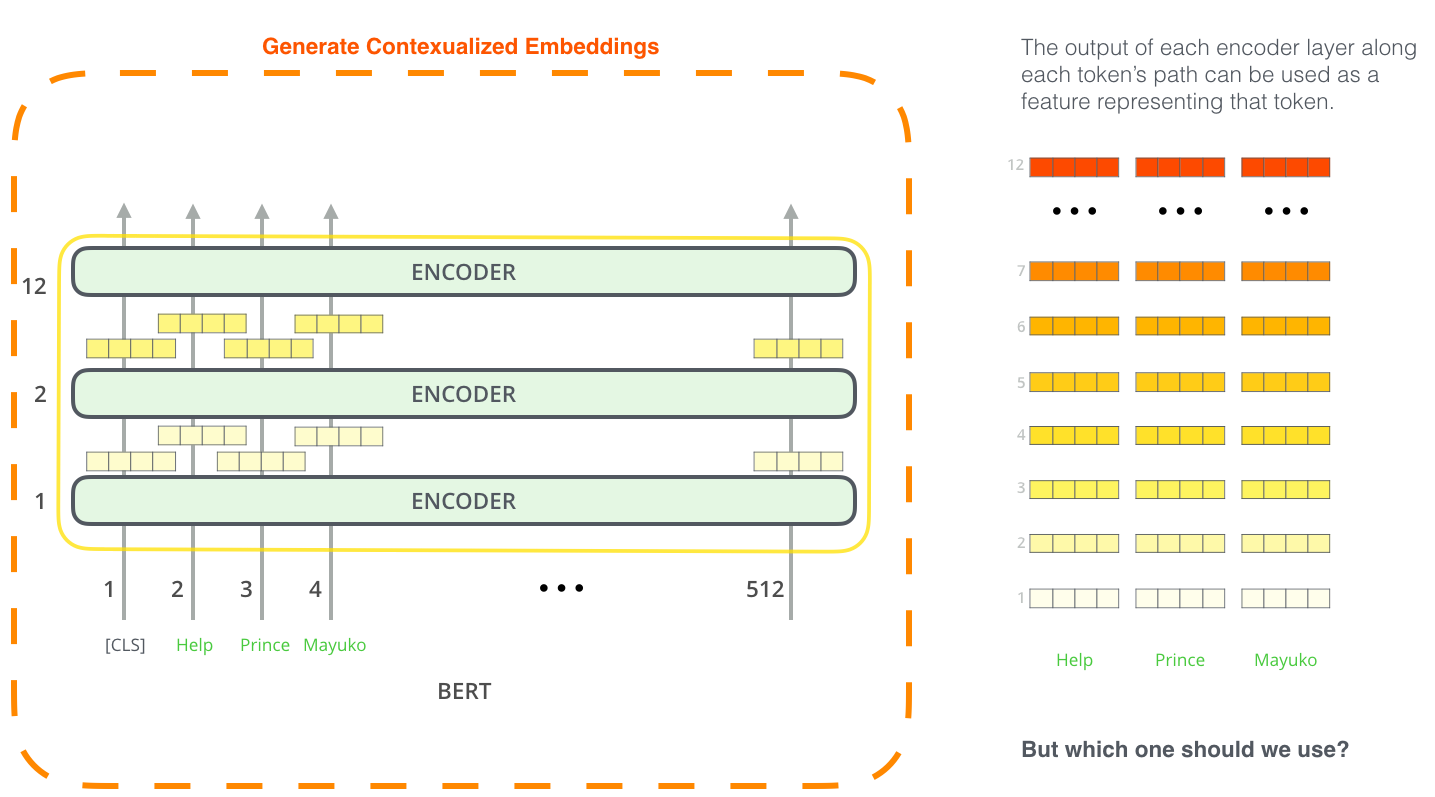

**Disclaimer**: Each pretrained transformer model (e.g. BERT base) has its own tokenizer, where the vocabulary of *types* (possible values for the *tokens*) is determined automatically based on the corpus and might not all be words in the dictionary (also includes subwords etc).

Let's see what a tokenized text looks like

In [ ]:
tokenizer.tokenize("I love my dog.")


['i', 'love', 'my', 'dog', '.']

How about more complicated (rare) words?

In [ ]:
tokenizer.tokenize("Dogs are overrated...")


['dogs', 'are', 'over', '##rated', '.', '.', '.']

In [ ]:
tokenizer.tokenize("This final example is supercalifragilistic!")


['this',
 'final',
 'example',
 'is',
 'super',
 '##cal',
 '##if',
 '##rag',
 '##ilis',
 '##tic',
 '!']

In [ ]:
tokenizer.tokenize("This final example is definetiley spellled corectly.")


['this',
 'final',
 'example',
 'is',
 'define',
 '##tile',
 '##y',
 'spell',
 '##led',
 'core',
 '##ct',
 '##ly',
 '.']

In [ ]:
tokenizer.tokenize("Ăsta e un text în altă limbă")


['as', '##ta', 'e', 'un', 'text', 'in', 'alta', 'limb', '##a']

In [ ]:
tokenizer.tokenize(" Φ(x) = Ψ(x)/2 😃")


['φ', '(', 'x', ')', '=', 'ψ', '(', 'x', ')', '/', '2', '[UNK]']

Special tokens in BERT:

- [CLS] - appended at the beginning of every input
- [SEP] - appended at the end of an input sentence or in between a pair of input sentences (used for the next sentence prediction task)
- [UNK] - unknown token, in case the model's vocabulary and alphabet can not be used to extract tokens at all



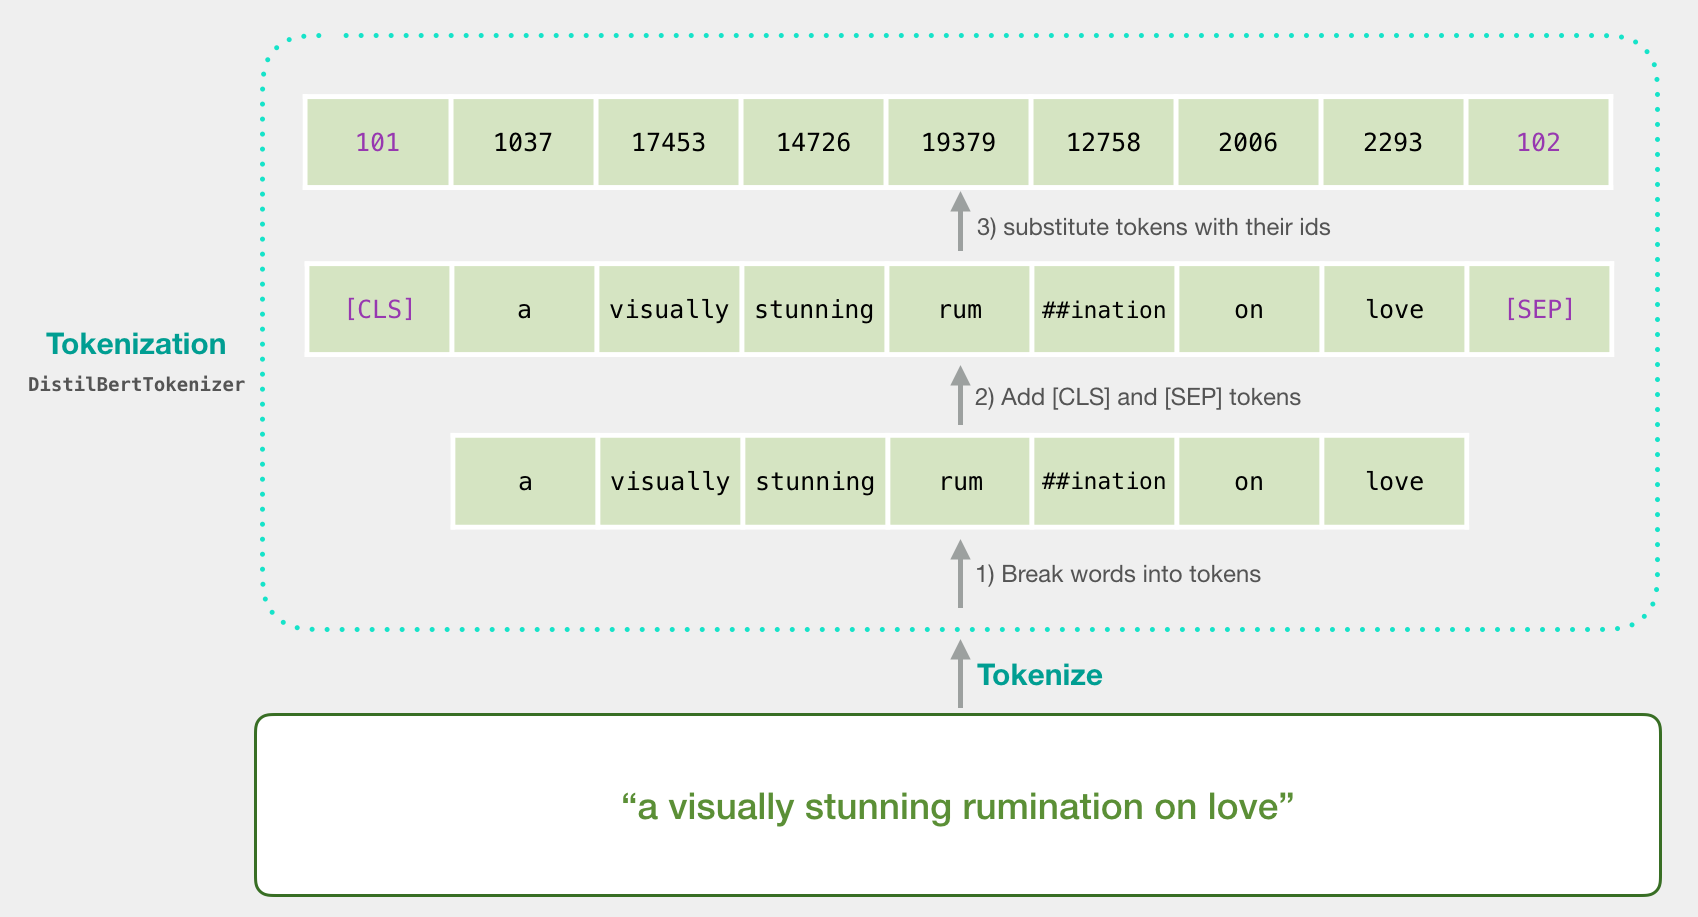

A short detour about pre-trained tokenizers: we can also train our own tokenizer. Training a new tokenizer creates a new vocabulary based on the frequencies of character n-grams (sub-words).

On the other hand, the internal learned weights of the model depend on the vocabulary of tokens, so re-computing the vocabulary can mean losing the knowledge learned by the pre-trained model...

More on pre-trained and training tokenizers here: https://huggingface.co/learn/nlp-course/en/chapter6

In [ ]:
training_corpus = ["Acesta este ceva text nou in alta limba. Imi va schimba vocabularul..."]
new_tokenizer = tokenizer.train_new_from_iterator(training_corpus, 500)


Let's go back to our pre-trained BERT. Now let's look at the model's internal states.

We want our model to return the hidden states, so we can capture them. The output_hidden_states parameter needs to be set to True for this.

There are 13 hidden states, the first corresponding to the embedding (projecting the vocabulary word to the (768,) embedding) and the rest corresponding to the 12 layers in the BERT-base model.

Output of each hidden state is (batch_size, number_of_tokens, 768).

Additional visualizations: https://jalammar.github.io/illustrated-bert/

In [ ]:
text = "I have never acted in a play."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs, output_hidden_states=True)

In [ ]:
inputs

{'input_ids': tensor([[ 101, 1045, 2031, 2196, 6051, 1999, 1037, 2377, 1012,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
outputs['last_hidden_state']

tensor([[[ 0.1001, -0.1347, -0.2394,  ...,  0.0467,  0.2717,  0.7833],
         [ 0.3207,  0.0962, -0.5257,  ...,  0.0212,  0.6051,  0.3669],
         [ 0.7216,  0.3293, -0.4872,  ..., -0.4895,  0.3183,  0.6573],
         ...,
         [ 0.2689, -0.1803, -0.1506,  ..., -0.2577, -0.1514,  0.0981],
         [ 0.0339, -0.1099, -0.3573,  ...,  0.4159,  0.0382, -0.5062],
         [ 0.5124,  0.1406, -0.1483,  ...,  0.4228, -0.5875, -0.3957]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
len(outputs['hidden_states'])

13

In [ ]:
outputs['last_hidden_state'].shape

torch.Size([1, 10, 768])

In [ ]:
for k in outputs:
  print(k)
  try:
    print(type(outputs[k]), outputs[k].shape)
  except:
    for t in outputs[k]:
      print(type(t), t.shape)

last_hidden_state
<class 'torch.Tensor'> torch.Size([1, 10, 768])
pooler_output
<class 'torch.Tensor'> torch.Size([1, 768])
hidden_states
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])


`hidden_states` contains intermediary layer outputs.

`last_hidden_state` contains the final output, with a 768-sized embedding for each input word.

`pooler_output` contains the last layer hidden-state of the first token of the sequence (classification token) further processed by a Linear layer and a Tanh activation function.

For retrieving word embeddings we use `last_hidden_state`.

In [ ]:

# first hidden layer
outputs.hidden_states[0].size()

# last hidden layer
outputs.hidden_states[-1].size()

torch.Size([1, 10, 768])

In [ ]:
# We also have an "embedding" layer at the beginning of the network
# This time we will not use embedding weights in the first layer for word meaning representation!
# Instead we will used the more refined representations obtained after passing through all the encoder layers
embedding = model.embeddings.word_embeddings  = embedding.weight
E.size()

torch.Size([30522, 768])

In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT

    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.

    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids

    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids


    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors

In [ ]:
bert_text_preparation("I like to play football.", tokenizer)

(['[CLS]', 'i', 'like', 'to', 'play', 'football', '.', '[SEP]'],
 tensor([[ 101, 1045, 2066, 2000, 2377, 2374, 1012,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
bert_text_preparation("I never acted in a play before.", tokenizer)

(['[CLS]', 'i', 'never', 'acted', 'in', 'a', 'play', 'before', '.', '[SEP]'],
 tensor([[ 101, 1045, 2196, 6051, 1999, 1037, 2377, 2077, 1012,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model given some input token ids

    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids

    Returns:
        list: List of list of floats of size
            [n_tokens, n_embedding_dimensions]
            containing embeddings for each token

    """

    # Gradient calculation is disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors, output_hidden_states=True)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs.hidden_states[1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

    return list_token_embeddings

In [ ]:
text = "I never acted in a play before."
tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

In [ ]:
print(len(list_token_embeddings), len(list_token_embeddings[0]))

10 768


In [ ]:

def get_embeddings_for_texts(texts, word, model):
  """Getting embeddings for the target word in all given contexts
  If the word does not occur in the vocabulary as is, then we will try to construct its
  embedding from sub-word tokens (by averaging them).

  Args:
      texts: the contexts where the word occurs
      word: the target word
      model: the pre-trained transformer model to use for extracting embeddings
  Returns:
      target_word_embeddings: a list of extracted embedding vectors from each of the input texts, in order

  """
  # Note: not the prettiest code! You can try your own improved version

  target_word_embeddings = []

  for text in texts:
      tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
      list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

      # Find the position of the word in list of tokens
      if word in tokenized_text:
        word_index = tokenized_text.index(word)
        # Get the embedding
        word_embedding = list_token_embeddings[word_index]
      # If the word is not in the vocabulary, try to construct it from sub-word tokens
      else:
        word_embedding_parts = []
        word_char_index = 0
        token_index = 0
        word_embedding = None
        while token_index < len(tokenized_text):
          t = tokenized_text[token_index]
          if word.startswith(t):
            word_char_index = len(t)
            word_index = tokenized_text.index(t)
            word_embedding_parts.append(list_token_embeddings[word_index])
          else:
            if not t.startswith("##"):
              word_char_index = 0 # reset index and embedding of subtokens
              word_embedding_parts = []
          # Move through tokens starting with ## and see we can concatenate them to match our target word
          while t.startswith("##") and t[2:] == word[word_char_index : word_char_index + len(t[2:])]:
            word_char_index += len(t[2:])
            word_index = tokenized_text.index(t)
            word_embedding_parts.append(list_token_embeddings[word_index])

            # We found a partial match: move on to next token
            token_index += 1
            t = tokenized_text[token_index]

          # We have found the entire match for the target word!
          # Stop and compute a unique aggregated embedding for the entire word: average of subwords embeddings?
          if word_embedding_parts and word_char_index == len(word): #
            word_embedding = np.mean(word_embedding_parts, axis=0)
            break
          token_index += 1
      if word_embedding is not None:
        target_word_embeddings.append(word_embedding)
  return target_word_embeddings

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd
# Calculating the distance between the
# embeddings of 'play' in all the
# given contexts of the word

# We can use cosine similarity again!

texts = ["I have never acted in a play before.", "I like to play football", "Don't play with my feelings!"]

target_word_embeddings = get_embeddings_for_texts(texts, 'play', model) + get_embeddings_for_texts(texts[2:3], 'feelings', model)
all_texts = texts + texts[2:3]
all_words = ['play']*len(texts) + ['feelings']
list_of_distances = []
for text1, embed1, word1 in zip(all_texts, target_word_embeddings, all_words):
    for text2, embed2, word2 in zip(all_texts, target_word_embeddings, all_words):
        cos_dist = 1 - cosine(embed1, embed2)
        list_of_distances.append([text1, text2, word1, word2, cos_dist])

distances_df = pd.DataFrame(list_of_distances, columns=['text1', 'text2', 'word1', 'word2', 'similarity'])

In [ ]:
distances_df

,text1,text2,word1,word2,similarity
0,I have never acted in a play before.,I have never acted in a play before.,play,play,1.000000
1,I have never acted in a play before.,I like to play football,play,play,0.452907
2,I have never acted in a play before.,Don't play with my feelings!,play,play,0.402713
3,I have never acted in a play before.,Don't play with my feelings!,play,feelings,0.244531
4,I like to play football,I have never acted in a play before.,play,play,0.452907
5,I like to play football,I like to play football,play,play,1.000000
6,I like to play football,Don't play with my feelings!,play,play,0.502336
7,I like to play football,Don't play with my feelings!,play,feelings,0.229364
8,Don't play with my feelings!,I have never acted in a play before.,play,play,0.402713
9,Don't play with my feelings!,I like to play football,play,play,0.502336


Now let's try to visualize them in our embeddings projector!

In [ ]:
import re
def construct_vectors_for_projector(texts, vocabulary=None):
  vectors = []
  labels = ["Word\tText"]
  for text in texts:
    print(text)
    for word in re.split(r'[^\w]', text.lower()):
      if not word:
        continue
      if vocabulary and word not in vocabulary:
        continue
      embed = get_embeddings_for_texts([text.lower()], word, model)[0]
      labels.append(f'{word}\t({text})')
      vectors.append('\t'.join([str(el) for el in embed]))
  vectors_text = '\n'.join(vectors)
  labels_text = '\n'.join(labels)
  return vectors_text, labels_text

In [ ]:
texts = ["I have never acted in a play before.",
         "I love to play football",
         "Don't play with my feelings...",
         "My favorite actor is old.",
         "My favorite animals are dogs, and I hate cats.",
         "Cats are supercalifragilistic animals!"
         ]
vocabulary = ["never", "acted", "play", "love", "football", "feelings", "actor", "old", "animals", "hate", "dogs", "cats", "supercalifragilistic"]
vectors, labels = construct_vectors_for_projector(texts, vocabulary)
with open('vectors.txt', 'w+') as f:
  f.write(vectors)
with open('labels.txt', 'w+') as f:
  f.write(labels)

I have never acted in a play before.
I love to play football
Don't play with my feelings...
My favorite actor is old.
My favorite animals are dogs, and I hate cats.
Cats are supercalifragilistic animals!


Take the output files that were created from the lefthand menu <---- ("Files")

And load them in https://projector.tensorflow.org/

# Sentence embeddings

If we combine the word embeddings obtained with a pre-trained transformer for all words in a given input sentence, we can obtain an embedding for the entire sentence, which will represent its meaning in vectorial form!

The pooling layer at the end of the BERT model takes the layer hidden-state of the first token of the sequence ([CLS]) further processed by a Linear layer and a Tanh activation function. in `pooler_output`.

**Note**: another possible way to obtain a sentence embedding for a given input sentence is to average the individual word embeddings in `last_hidden_layer`.

### Use-case: Romanian pre-trained BERT: RoBERT

In [ ]:
from transformers import AutoModel, AutoTokenizer, TFAutoModel
tokenizer = AutoTokenizer.from_pretrained("readerbench/RoBERT-base")
model = TFAutoModel.from_pretrained("readerbench/RoBERT-base")


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/245k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/581M [00:00<?, ?B/s]

Some layers from the model checkpoint at readerbench/RoBERT-base were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at readerbench/RoBERT-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn

In [ ]:
sentence1 = "Demult nu mai trag cu prastia-n vrabii"
inputs1 = tokenizer(sentence1, return_tensors="tf")
output1 = model(inputs1)

In [ ]:
inputs1

{'input_ids': <tf.Tensor: shape=(1, 13), dtype=int32, numpy=
array([[    3,  6160,    24,    23,  8632,    13,  6724, 26952,    57,
         1350, 21256, 23317,     4]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1, 13), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 13), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [ ]:
tokenizer.convert_ids_to_tokens(inputs1['input_ids'][0])

['[CLS]',
 'demult',
 'nu',
 'mai',
 'trag',
 'cu',
 'pra',
 '##stia',
 '-',
 'n',
 'vra',
 '##bii',
 '[SEP]']

In [ ]:
sentence2 = "Demult nu mai merg la nicio-ngropare"
inputs2 = tokenizer(sentence2, return_tensors="tf")
output2 = model(inputs2)

In [ ]:
sentence3 = "De ce trag clopotele, Mitica?"
inputs3 = tokenizer(sentence3, return_tensors="tf")
output3 = model(inputs3)

In [ ]:
output1.pooler_output[0] # returns the embedding of the [CLS] token passed through an additional layer.

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-9.97646570e-01, -8.23535740e-01,  4.81598914e-01,  7.77234674e-01,
       -2.02540666e-01,  4.86901671e-01, -8.77025127e-02, -1.31490007e-01,
        6.92534268e-01, -1.45345718e-01,  5.32909781e-02,  1.57394618e-01,
       -3.91620129e-01, -3.21051300e-01,  2.47555822e-01, -3.15500885e-01,
       -5.98068058e-01, -1.37713775e-02, -7.82735825e-01,  4.80223149e-01,
        8.81448165e-02,  2.17314541e-01, -2.88760751e-01,  2.74025559e-01,
       -2.74074912e-01, -6.26516521e-01,  4.85705175e-02, -5.63086212e-01,
        2.46469334e-01, -4.11392510e-01, -5.48759937e-01, -4.17481542e-01,
       -3.12010497e-01,  9.82997537e-01,  6.55082226e-01,  8.75888288e-01,
        2.91110903e-01, -8.42966378e-01, -4.65925097e-01,  6.37041986e-01,
       -9.89998698e-01, -4.01601553e-01,  9.32468474e-03,  2.03975305e-01,
        9.88938630e-01, -8.02053511e-01, -3.77129078e-01, -3.26886803e-01,
        4.26290631e-02,  2.51934469e-01,  2.86924571

In [ ]:
# We can again compare sentence embeddings using cosine similarity!
cosine_similarity([output1.pooler_output[0], output2.pooler_output[0], output3.pooler_output[0]])

array([[1.        , 0.9526312 , 0.56508636],
       [0.9526312 , 1.0000002 , 0.6536875 ],
       [0.56508636, 0.6536875 , 0.99999994]], dtype=float32)

### Sentence similarity on news data: case study

We find Romanian news articles on two distinct topics: sports (Google search results for "campionat") and weather (Google search results for "zapada londra" and "clima bucuresti").

We will compare the proximity in sentence embedding space of these articles and verify whether RoBERT-based sentence embeddings can capture semantic similarity.

In [ ]:
campionat1 = """

Finalistele ediţiei trecute a Campionatului Mondial, Rusia 2018, Franța și Croația, s-au calificat în semifinalele Cupei Mondiale 2022. Croaţia va întâlni Argentina marți, 13 decembrie, în prima semifinală, pe Lusail Stadium, de la ora 21.00. Franţa va juca împotriva Marocului miercuri, 14 decembrie, pe Al Bayt Stadium, la ora 21.00. Croația s-a calificat în semifinale după ce a învins Brazilia cu 4-2, după loviturile de la 11 metri. Argentina a bătut Olanda cu 4-3, tot la 11 metri, după unul dintre cele mai intens disputate meciuri ale campionatului din Qatar. Franța a învins Anglia cu 2-1 în sferturi, după ce englezii au ratat un 11 metri care ia-r fi putut duce în prelungiri. Maroc, marea surpriză a mondialului, a ajuns în semifinale după ce a bătut Portugalia cu 1-0, făcându-l pe Cristiano Ronaldo, care a început meciul pe banca de rezerve, să-l termine în lacrimi.

Citește mai mult la: https://www.digi24.ro/stiri/sport/fotbal/cm-2022-programul-semifinalelor-campionatului-mondial-din-qatar-cand-si-unde-se-joaca-meciurile-care-vor-decide-finalistele-2180305

Informaţiile publicate pe site-ul Digi24.ro pot fi preluate, în conformitate cu legislația aplicabilă, doar în limita a 120 de caractere.
"""

In [ ]:
campionat2 = """
Maroc este stimulată să treacă mai departe și de semifinale. Pentru meciul cu Franța, emirul Qatarului, Tamim bin Hamad Al Thani, i-a făcut o nouă invitație regelui Mohammed al VI-lea să vină la Doha să-i vadă live pe elevii lui Walid Regragui. Încă n-a dat un răspuns, însă jucătorii îl așteaptă pentru a le premia performanța.

Cum sunt motivați marocanii înainte de semifinala cu Franța
Deja pentru calificarea la CM 2022 au primit câte un milion de dirhami (circa 91.000 de euro), dar pentru că au ajuns între primele 4 echipe ale lumii bonusul va crește substanțial.
"""

In [ ]:
campionat3 = """
Astfel, Olanda și Argentina se vor duela în primul sfert de finală al turneului. În al doilea, vor da piept învingătoarele din partidele Japonia - Croația și Brazilia - Coreea de Sud, meciuri care se vor disputa luni, 5 decembrie.

Apoi, semifinala de pe prima parte a tabloului se va juca între Olanda/Argentina și Japonia/Croația sau Brazilia/Coreea de Sud.
Dacă prima semifinală ar putea fi Olanda - Brazilia sau Argentina Brazilia, în cea de-a doua calculele sunt mult mai dificil de făcut pentru că, dacă favoritele hârtiei se califică din optimi, în sferturi vom avea Anglia - Franța și Portugalia - Spania.


"""

In [ ]:
zapada1 = """
Poliția din Marea Britanie a emis o avertizare de ceață înghețată, duminică dimineață. Țara se confruntă cu două săptămâni de haos din cauza zăpezii, chiar înainte de Crăciun, cu temperaturi de -12 grade Celsius.

Zăpada a căzut în mai multe zone din Marea Britanie, duminică dimineață, inclusiv în The Costwolds, Bristol, Țara Galilor, Herefordshire, Cumbria și Sheffield.

Mai multe accidente au fost raportate până acum, trenurile din Kent au întârzieri, iar mai multe curse Sheffield Supertram au fost parțial suspendate.

O localnică din Bourton-on-the-Water, Jane Webb, a declarat pentru MailOnline că șoferii sunt blocați în nămeți de peste o oră, unii dintre ei alegând să-și abandoneze mașinile pe drum
"""

In [ ]:
zapada2 = """
Londonezii s-au luptat luni prin zăpadă și gheață, când școlile, căile ferate și liniile de metrou au fost închise, sute de zboruri au fost eliminate și au fost emise avertismente pentru o săptămână de haos pe rețeaua de transport.

Capitala s-a trezit cu un covor dens de zăpadă și îngheț, cu o avertizare de cod galben de vreme severă în sud-est pentru zăpadă, gheață și ceață până marți la ora 11.00. Agenția de asigurări auto AA a transmis că scenele din „Țara minunilor de iarnă” au creat un „scenariu de coșmar” pe drumuri.

Șoferii de pe tronsoanele M25 au fost blocați ore întregi cu traficul oprit, în timp ce mulți părinți au fost nevoiți să-și ia timp liber de la serviciu pentru a avea grijă de copiii ale căror școli erau închise. Haosul a venit înaintea zilelor de grevă care va distruge majoritatea serviciilor de pe căile ferate din Marea Britanie, începând de marți.
"""

In [ ]:
clima = """
Vremea in Bucuresti este caracterizata in principal de o clima continentala, ceea ce inseamna ca verile sunt uscate si calduroase si iernile fruguroase.

Datorita altitudinii si pozitiei sale geografice, in oras in timpul iernii pot fi vanturi aspre, chiar daca unele vanturi sunt atenuate de catre cladirile inalte. Temperaturile din timpul iernii ajung sub 0°C, chiar daca rar scad sub -10°C. Vara, temperatura medie pentru lunile iulie si august este de 23°C, cu toate ca in ultimii ani temperaturile au depasit 40°C la orele pranzului.

Media precpitatiilor si a umiditatii in timpul verii este scazuta, dar ocazional apar furtuni violente. In timpul verii si toamnei, temperaturile variaza intre 18-22°C, iar precipitatiile in aceasta perioada tind sa creasca, fiind perioade mai frecvente dar blande de ploi.

Temperaturi minime si maxime (medii) inregistrate in ultimii ani

Clima municipiului Bucuresti este moderat-continentala, cu o temperatura medie anuala de 10-11°C; influentele vestice si sudice explica prezenta toamnelor lungi si calduroase, a unor zile de iarna blande sau a unor primaveri timpurii. Acest climat moderat-continental prezinta unele diferentieri ale temperaturii aerului, specifice oraselor mari, cauzate de incalzirea suplimentara a retelei stradale, de arderile de combustibil, de radiatia exercitata de zidurile cladirilor etc. In general iernile sunt reci, cu zapezi abundente, insotite deseori de viscole.
"""

### Sentence tokenization and sentence embedding extraction

In [ ]:
import nltk
nltk.download('punkt') # needed for sentence segmentation and word tokenization with NLTK

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

First we will try to obtain a unique embedding for each news article by averaging its sentences. We store this in `news_embeddings`.

Separately, we keep all original embeddings of each sentence in each news article (in `all_embeddings`).

In [ ]:
%%time

# Ugly code alert!

import numpy as np
from nltk import sent_tokenize

news = [campionat1, campionat2, campionat3, zapada1, zapada2, clima]

news_embeddings = []
all_embeddings = []
i = 0
for article in news:
  sentences = sent_tokenize(article)
  embeddings = []
  for s in sentences:
    print(i, s)
    i+=1
    if not s.strip():
      continue
    inputs = tokenizer(s, return_tensors="tf")
    output = model(inputs)
    embeddings.append(output.pooler_output[0])
    all_embeddings.append(output.pooler_output[0]) # individual sentence embeddings
  news_embeddings.append(np.mean(embeddings, axis=0)) # article embeddings are average of sentence embeddings per article

0 

Finalistele ediţiei trecute a Campionatului Mondial, Rusia 2018, Franța și Croația, s-au calificat în semifinalele Cupei Mondiale 2022.
1 Croaţia va întâlni Argentina marți, 13 decembrie, în prima semifinală, pe Lusail Stadium, de la ora 21.00.
2 Franţa va juca împotriva Marocului miercuri, 14 decembrie, pe Al Bayt Stadium, la ora 21.00.
3 Croația s-a calificat în semifinale după ce a învins Brazilia cu 4-2, după loviturile de la 11 metri.
4 Argentina a bătut Olanda cu 4-3, tot la 11 metri, după unul dintre cele mai intens disputate meciuri ale campionatului din Qatar.
5 Franța a învins Anglia cu 2-1 în sferturi, după ce englezii au ratat un 11 metri care ia-r fi putut duce în prelungiri.
6 Maroc, marea surpriză a mondialului, a ajuns în semifinale după ce a bătut Portugalia cu 1-0, făcându-l pe Cristiano Ronaldo, care a început meciul pe banca de rezerve, să-l termine în lacrimi.
7 Citește mai mult la: https://www.digi24.ro/stiri/sport/fotbal/cm-2022-programul-semifinalelor-campio

In [ ]:
np.array(news_embeddings).shape

(6, 768)

In [ ]:
np.array(all_embeddings).shape

(35, 768)

In [ ]:
cosine_similarity(news_embeddings) # Gives us the similarities between all pairs of news articles (visualized more nicely below)

array([[1.        , 0.8532654 , 0.8848295 , 0.8761908 , 0.90466094,
        0.78669435],
       [0.8532654 , 1.        , 0.9003004 , 0.85357666, 0.86038   ,
        0.7707115 ],
       [0.8848295 , 0.9003004 , 1.0000002 , 0.81844336, 0.83920425,
        0.77372086],
       [0.8761908 , 0.85357666, 0.81844336, 1.0000001 , 0.9526055 ,
        0.7735059 ],
       [0.90466094, 0.86038   , 0.83920425, 0.9526055 , 1.0000001 ,
        0.79725456],
       [0.78669435, 0.7707115 , 0.77372086, 0.7735059 , 0.79725456,
        0.9999999 ]], dtype=float32)

In [ ]:
cosine_similarity(news_embeddings).mean() # On average, the similarity is pretty high

0.8691858

In [ ]:
cosine_similarity(all_embeddings)[:19].mean() # If we compare individual sentence embeddings instead, it gets a bit lower

0.7580547

## Visualizing sentence similarity


Similarity between all pairs of news articles (where a news article is represented as the average of its sentences' embeddings). We see a higher similarity on the main diagonal (self-similarity), and a vague closeness of some related articles (3 and 4).

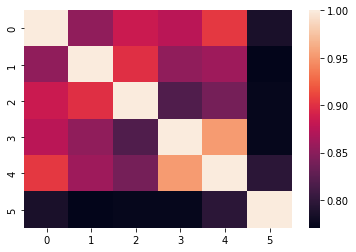

In [ ]:
seaborn.heatmap(cosine_similarity(news_embeddings))

Similarity between all pairs of sentences in all articles.

We can see a more interesting pattern here: some lighter "squares" which mark groups of similar sentences. These are actualy the sentences belonging to the same news article.

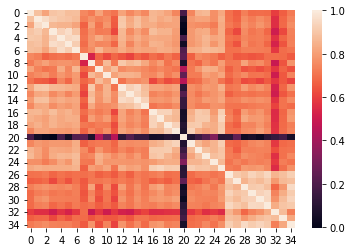

In [ ]:
seaborn.heatmap(cosine_similarity(all_embeddings))

More transformer resources:

- BERT paper: https://arxiv.org/abs/1810.04805
- https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/


# Next... All roads lead to text classification

Of course, one essential type of task in NLP is text classification.

Pretrained sentence embeddings can be very useful for easily training models that encode semantics well without having to train too many parameters.

How?

One way to use pre-trained models on other classification tasks (e.g. sentiment analysis, fake news detection, topic classification, etc....) is to add a simple classifier on top of the final sentence embedding obtained from a pretrained model.


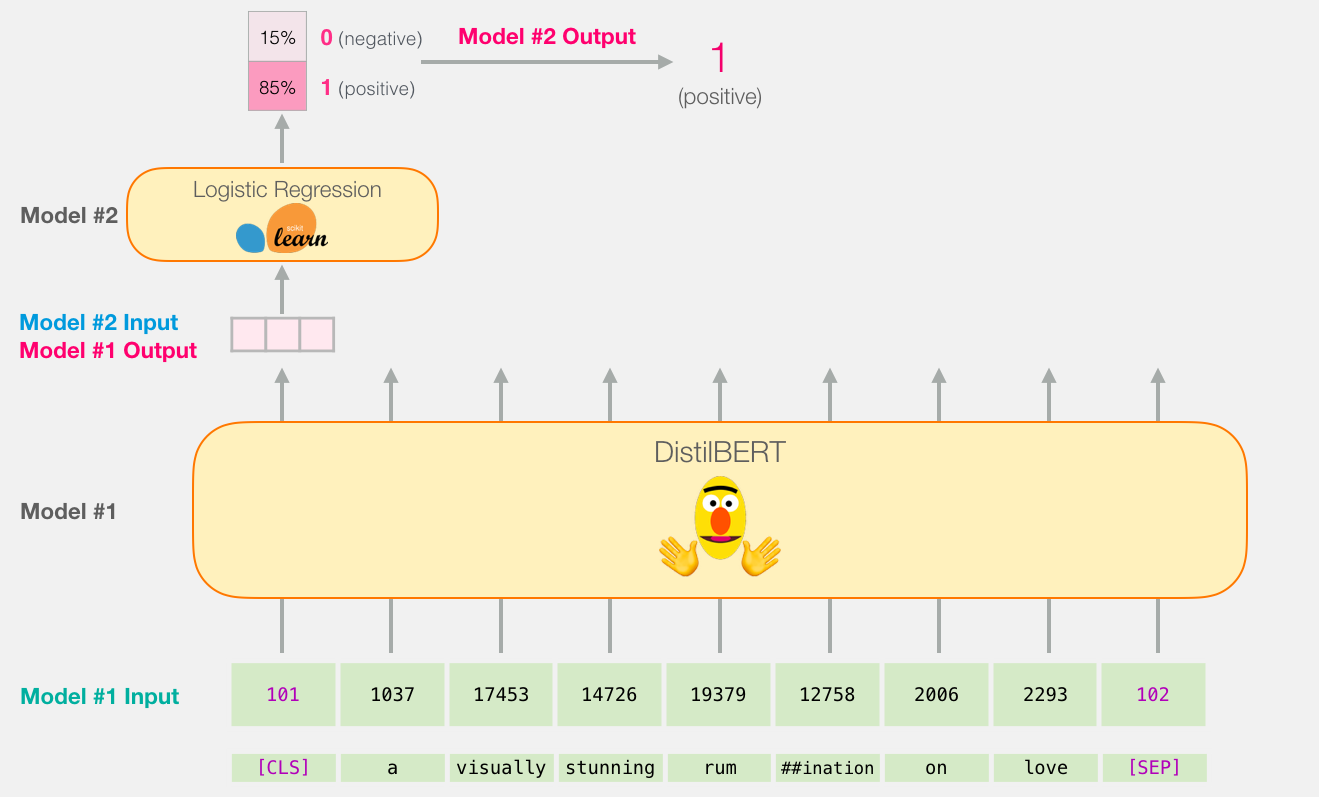

This is called **transfer learning**, which is the basic priciple applied any time we used pre-trained models or representations (the model "transfers" the knowledge it learned during the first semi-supervised task to the new task).

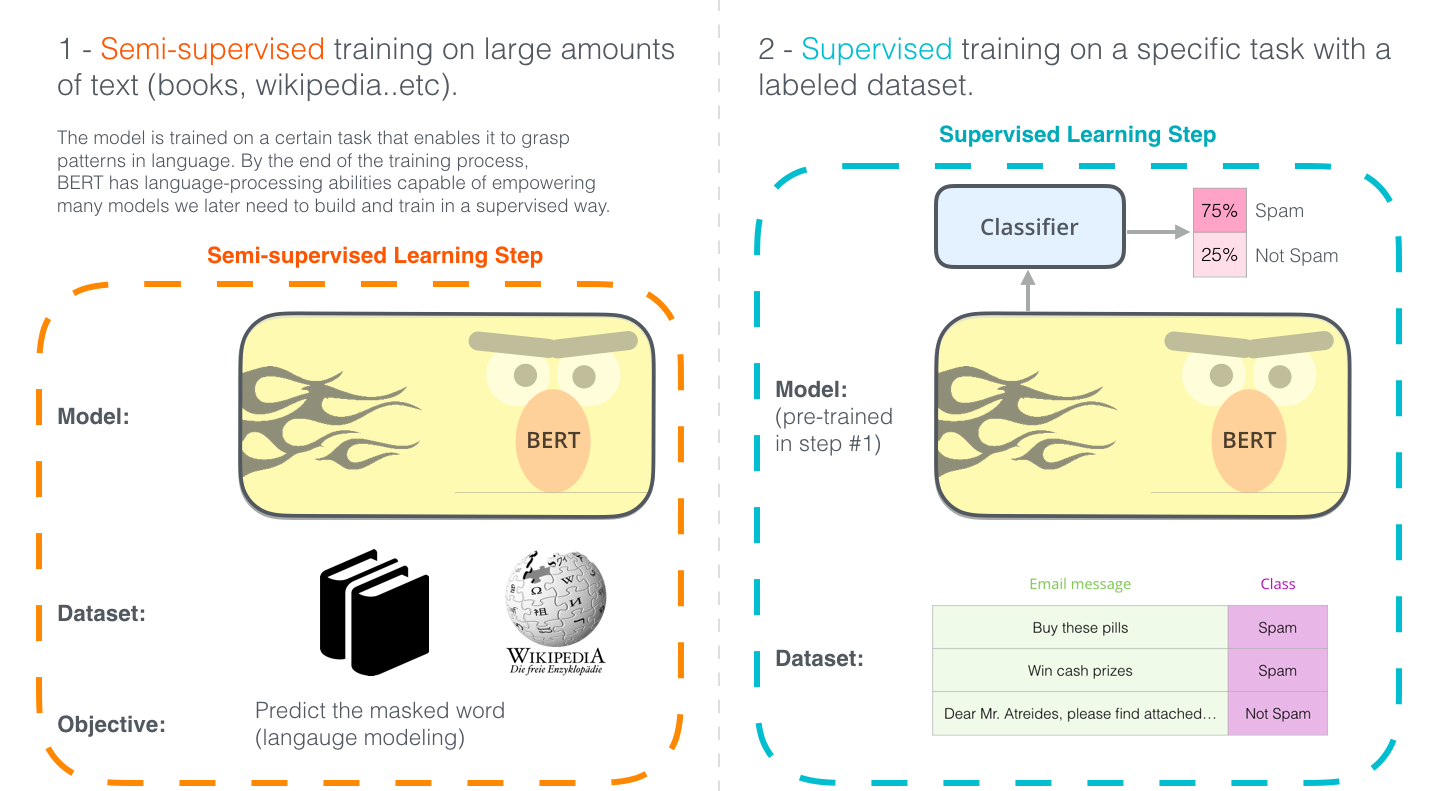

Images source: https://jalammar.github.io/illustrated-bert/

You can follow this example for extracting and classifying BERT sentence embeddings for sentiment analysis (this time using Tensorflow):

https://colab.research.google.com/drive/1yR7yvXX2Hm9nYLFVjDrQmOR-1ftqOXfV?usp=sharing

### Finally... fine-tuning of pre-trained models

If we want more than this, we can train the entire pre-trained transformer on our training data annotated for our specific task.

Again, we can make use of its pre-training! We don't have to start from scratch, but we can instead start with the pre-trained model's weights and continue training them on our new task.

This is called **fine-tuning** the model and is an essential technique in transfer learning.

You might need fine-tuning if:

- you have enough training data to train the many parameters of BERT
- your data is similar enough (same language) but also different enough that the pre-trained embeddings don't represent meaning well (e.g. in terms of topics discussed - news vs product reviews)
- if the data is completely different (English vs Chinese) then you will need a different solution... (train something from scratch)

You can follow this example for fine-tuning BERT for a binary classification task (detecting COVID-related fake news): https://colab.research.google.com/drive/1c4-6_dP5uzXlLqxKf89LdHbxl9dbctKA?usp=sharing

Or the official hugginface course on fine-tuning: https://huggingface.co/learn/nlp-course/chapter3/1?fw=pt

Or the tutorial from Dana Dascalescu (posted on Discord)


**Note**: We can do the same with static word embeddings - use the pre-trained embeddings as initial values for features in your model (e.g. initialize the Embedding layer weights with these) and then continue to train (fine-tune) them on your task.

### Even more training...

Finally, you could also train a BERT model (or any other transformer architecture) from scratch, for it to learn to model the language, without focusing on a specific classification task. This is more expensive and is needed only if you want to re-learn word representations and associations entirely (e.g. for an entirely new register of the language - social media vs medical science, for an entirely new language, etc)

BERT was pre-trained on two tasks in order to learn language modelling, which can be done in pytorch if you have enough data (BERT was originally pre-trained on a ~3 billion token corpus):

- Masked Language Model task



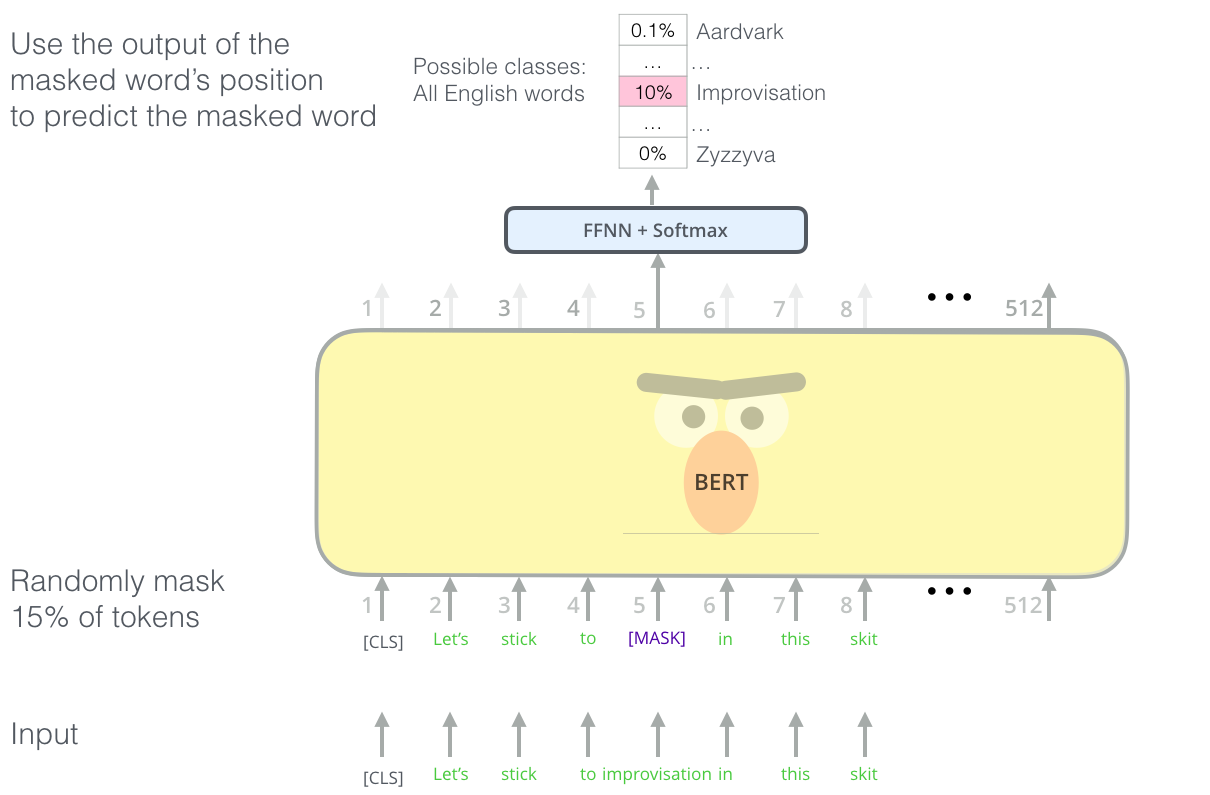

- Next Sentence Prediction task

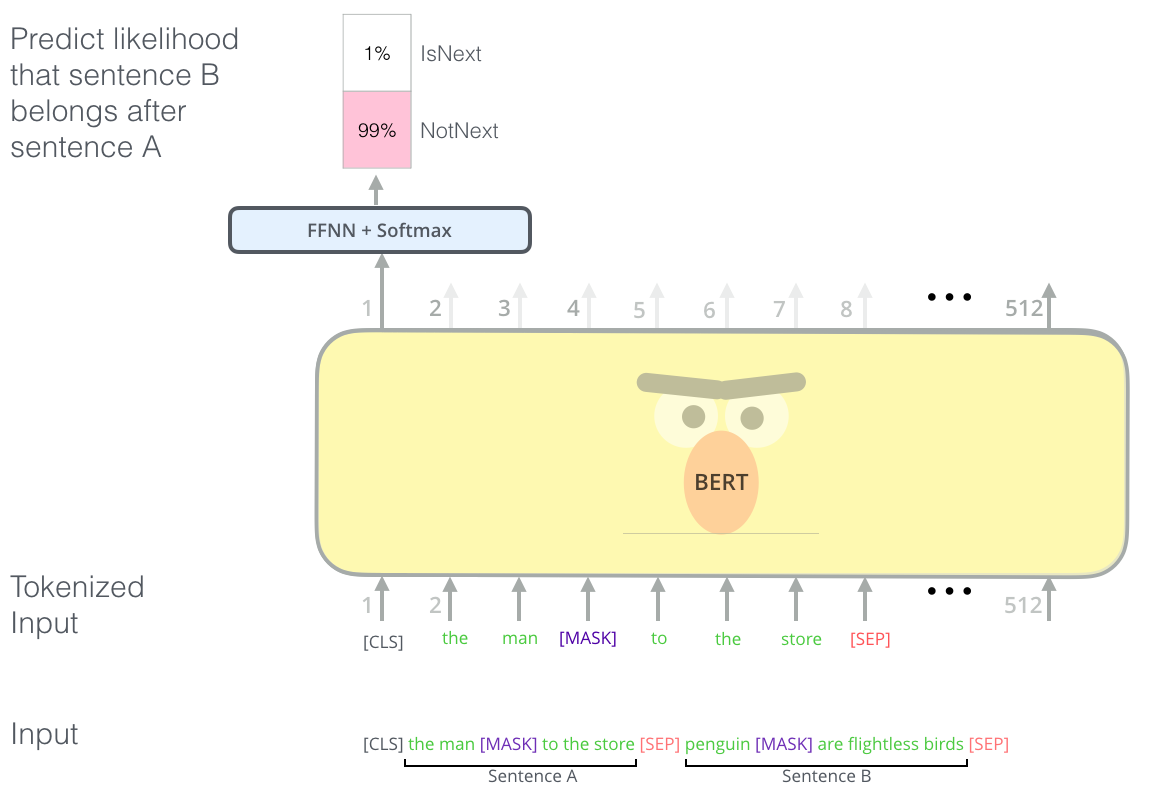

More here on how to "pre-train" BERT from scratch: https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForMaskedLM , https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertForNextSentencePrediction
